In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
import math
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score as val_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split as sk_split
import statsmodels.api as sm
import time

%matplotlib inline

In [2]:
predicted_cardio = [146.15158617747238,
 659.14231930927963,
 433.01652098891435,
 171.70471316663918,
 188.83171252200202,
 383.75368002394754,
 173.19988017720547,
 215.50528566953403,
 234.38444048699677,
 349.79143823027033,
 396.15391119617141,
 137.88007075095419,
 242.50062418205212,
 214.42809362439439,
 349.8877341254198,
 286.23424876433705,
 521.90366722645797,
 201.61506070833818,
 158.89180860470901,
 283.41347025725668,
 346.49722563048653,
 249.80680323280814,
 309.03375964167935,
 378.9009113856755,
 378.42662736504604,
 304.59474005433685,
 215.80584539691444,
 378.3641782766781,
 237.47690195799677,
 513.76090748782633,
 365.04308384706133,
 299.98334746717751,
 555.03394556152193,
 390.20802240907949,
 245.69655216830535,
 575.60187466255979,
 497.55202051338239,
 500.38002562559512,
 258.98066066303852,
 479.32003223981025,
 327.97705572875077,
 682.05207733938391,
 177.90576283276849,
 268.16936631288803,
 341.16479362103814,
 203.69646433319093,
 246.93845224363267,
 271.73428870851745,
 291.70309716269014,
 265.73055867182393,
 208.23680374352574,
 386.90610766537031,
 328.30183133910384,
 539.95280679976588,
 173.14311271118362,
 301.37135561924077,
 317.58541761423373,
 617.165768783972,
 263.0321572129422,
 338.18716858109093,
 255.23320584093997,
 253.54772071961241,
 106.2283917893692,
 134.04101180743532,
 276.42326619278265,
 498.34799008647661,
 480.0165105683227,
 357.09186811071697,
 319.3268218960518,
 322.24070393905862,
 383.13202232992148,
 242.26734297291227,
 300.92251839918686,
 187.0558586663881,
 349.28988267215948,
 325.39859098404912,
 392.27554557440743,
 325.05916964937933,
 228.39058571486871,
 364.8783994685499,
 187.664372358137,
 496.21253251173772,
 176.6679173530442,
 223.1289467880311,
 225.17112188949076,
 242.32414285198607,
 286.05245862292946,
 223.83138577809657,
 556.24715880068243,
 526.92079396734414,
 291.4245556109222,
 333.13250125948503,
 243.19939037862579,
 182.50943111941174,
 250.32350646961623,
 336.39945056468497,
 222.82200273640515,
 506.03940442598048,
 535.71951995823679,
 376.20043567735325,
 255.49892019012597,
 327.80984240881287,
 336.85528861532305,
 351.23786287193127,
 423.07509642800159,
 309.38884599704147,
 229.3804926310404,
 230.54745757452451,
 350.52265699141179,
 254.77459268607188,
 376.34831560173097,
 253.15519564256707,
 305.15469037144908,
 624.8031957450861,
 433.45840578749096,
 335.57826285135843,
 394.84834362638651,
 178.55491285551963,
 252.4976071072623,
 222.95796145252478,
 348.46325433393275,
 96.003637338980468,
 290.2234935514573,
 273.0038009427501,
 114.1063538831018,
 228.73226203502205,
 195.86948288124651,
 157.56862461155077,
 255.56553287015885,
 289.59605880750735,
 261.53457633217295,
 351.4800734160911,
 144.88230919982755,
 625.78896007393473,
 399.28503690439589,
 335.36247810950641,
 654.91110405778522,
 356.55198341444566,
 473.15774200338961,
 374.60852727754315,
 207.82332038503031,
 325.56645483283444,
 160.95075654799206,
 378.14245506414034,
 251.62137888558826,
 388.33304667938665,
 351.40618854866409,
 273.03472987642658,
 406.56539143954848,
 315.48266111114424,
 261.05976184175461]

In [4]:
predicted_diabetes = [6.9721334122642116,
 27.604610047718992,
 11.293803119207793,
 19.083658020346178,
 29.268855868404319,
 86.072936848578593,
 17.891447483377206,
 32.617771895309843,
 57.227386828262084,
 29.532345949998742,
 39.360131579783605,
 9.5994284412984783,
 30.340116250486869,
 46.149760692200658,
 22.491491055626582,
 36.420614230748455,
 2.4989439362933208,
 17.704513820536498,
 17.994591422803051,
 44.116169323825474,
 27.774625405097144,
 40.994407582705421,
 34.450230268679874,
 59.280505136053115,
 37.344668813112847,
 26.639980921408984,
 19.729392367132057,
 38.565024446030414,
 74.436718950629938,
 17.306601933950862,
 39.622216375505488,
 16.693465208778143,
 31.939363381912038,
 74.820875386429961,
 30.886282622202039,
 25.430612644167695,
 26.38925690300815,
 25.713419834317239,
 43.629431579644979,
 8.0740676105065532,
 28.720845291308489,
 11.746621807687331,
 10.764043295950099,
 30.963256414578012,
 17.799656294999423,
 26.632252294916341,
 27.949975969412915,
 23.078677505514136,
 38.658700118517316,
 33.743808973839691,
 20.270173978422292,
 40.757110586709366,
 14.658834635802377,
 13.707377606571333,
 28.876621884730685,
 48.420941862275576,
 32.279909385075996,
 18.137653851111544,
 4.8673372410178191,
 65.073633029448857,
 21.324188386046778,
 113.67251388203712,
 -6.8327986412594939,
 13.975052657192677,
 30.78582599028276,
 28.209207513767339,
 8.1816376244785491,
 38.415360886594115,
 52.838564897035965,
 78.202221339151379,
 76.423303821554896,
 49.456544309567562,
 38.413430337471617,
 2.1038810554404481,
 45.511524176420011,
 54.334492097864427,
 2.0657452054815728,
 39.26800919179955,
 42.865732983881195,
 63.770637571788015,
 38.526005141105202,
 2.2941760154993283,
 19.419363526722201,
 9.9141645108279093,
 35.552403528571716,
 6.8204842208988712,
 55.853678515097002,
 18.424766913689666,
 -8.8953657264813053,
 70.537978403112618,
 36.385476593466322,
 77.926071702309912,
 16.289080252483544,
 6.1315769966351921,
 27.626743632606861,
 47.622386246539087,
 51.091727254822338,
 60.314988618430895,
 4.4861333276562316,
 23.475230782189556,
 47.419677937085538,
 31.691983405024661,
 92.824759263452449,
 8.1410323192486711,
 57.67383362578088,
 45.997614365789353,
 0.9903205446708494,
 41.691981676671858,
 34.35883812535171,
 17.699598783412821,
 12.924159197771607,
 26.164874767624781,
 41.141292864716419,
 9.0480936565609404,
 16.204675289814272,
 36.283810148804655,
 37.819958106088237,
 23.207632515530566,
 32.962689988316583,
 70.846564175361152,
 13.284543793208913,
 25.784568157095915,
 51.0812990076872,
 12.396488206645992,
 10.471677042430771,
 54.845845869352644,
 24.293231842013292,
 3.1769843864376544,
 43.199454577413746,
 47.356758625400573,
 25.05750041778202,
 35.114149613986584,
 7.2873105175256612,
 -2.7942812508708368,
 18.707063756735657,
 44.464460600056462,
 2.0162069516965051,
 125.62347120753083,
 20.488522104623364,
 77.688512893075597,
 38.056674791326472,
 35.264579879857507,
 54.602247961764462,
 36.467918378982873,
 42.308871440561148,
 16.294042157494534,
 36.380646185369741,
 -5.6402880435418474,
 49.895287201694053,
 51.554249701478106,
 40.927175899655794]

In [5]:
predicted_cancer =  [144.88363236033689,
 123.87023871776628,
 151.62669169329249,
 106.38240337681702,
 100.71319552540812,
 96.680751469993396,
 135.61673876217975,
 70.076939379451417,
 119.76960091914339,
 85.288605953414773,
 84.521034263382319,
 114.77151435820466,
 162.66221983614486,
 120.98936295047655,
 131.83209176939096,
 116.93419024922146,
 164.23727805582143,
 141.82005529625633,
 107.15480112827875,
 106.79977037346519,
 117.04576037798461,
 136.07509669562043,
 78.797089147684019,
 63.607173949186475,
 90.750609071601602,
 70.000022268816608,
 155.20184087102854,
 85.813487515971261,
 127.79692756217713,
 113.75153830466877,
 150.99776001715782,
 121.6376547766484,
 145.60643264390359,
 83.349522932348307,
 116.15228070522258,
 83.522196935582713,
 146.12542762362725,
 125.83317768872868,
 108.51363041299547,
 113.15001741748749,
 87.014298135033357,
 276.98833816008073,
 166.8029909455353,
 160.50302547342724,
 123.24075189361984,
 133.95627995781209,
 130.82235381711888,
 141.15246850561087,
 110.59521496582525,
 98.426169784130579,
 139.45503555375316,
 108.54805150657785,
 135.09142814935831,
 179.24875106595255,
 154.77220891027619,
 83.123711173518998,
 120.13614036719162,
 128.83059425335765,
 114.59571192077271,
 115.3509661058211,
 81.051352032501811,
 73.416280880226481,
 136.91410421209002,
 139.06674617371533,
 99.533173785628961,
 155.2716377492269,
 115.67949888506585,
 60.576351989185994,
 78.161540706325653,
 129.9069783094034,
 112.71114503794543,
 80.64640077551438,
 114.87123598549378,
 151.31042529230416,
 125.2817971072121,
 143.2391377629969,
 195.66306938510166,
 62.098861013813412,
 123.7751490237581,
 76.198326638428256,
 98.372766154096041,
 129.20774680117583,
 110.81141595821263,
 143.62206759263825,
 116.58563638505865,
 145.27917595999395,
 110.33886606329017,
 133.77817581705852,
 158.44866892909616,
 97.84805557985365,
 96.029015501354436,
 131.08185284018214,
 122.28348539477633,
 156.9947103478649,
 121.22858124101126,
 114.06986507246353,
 122.20628226524494,
 79.957687870999848,
 92.106262264448929,
 138.57942152647129,
 60.13776273197373,
 69.225951103450342,
 79.742819240680234,
 171.75814966891619,
 81.185394412179704,
 103.81949954282497,
 116.57965920117256,
 103.85087113330015,
 87.785314279844442,
 141.70953853893252,
 125.69364702930659,
 146.98367559027849,
 122.13335519570451,
 85.350375464804472,
 113.7632522669451,
 109.10593473113543,
 174.83857402246338,
 107.68426415687036,
 130.84056784119727,
 154.45061062358283,
 114.63381690654828,
 116.01754542069185,
 84.361588334543583,
 161.09300864246944,
 146.5445826664687,
 93.367303780519421,
 114.73007707005691,
 135.85037599187513,
 133.92124237728439,
 101.66271431293021,
 241.24532612250826,
 137.67859396035647,
 177.40243817070487,
 167.46037791514584,
 161.61199356235562,
 90.536985657428687,
 140.06705022893283,
 131.13599745619928,
 175.52180926798368,
 174.26271903330422,
 111.88116171313368,
 93.100281236248605,
 83.618619502721558,
 87.428441434551232,
 95.499423803847478,
 173.70923663896278,
 63.652193805729986,
 145.15088382816501,
 69.326900350282074,
 83.356521562349471,
 120.61536615489773]


In [6]:
country_list = ['Canada',
 'Turkmenistan',
 'Lithuania',
 'Cambodia',
 'Ethiopia',
 'Swaziland',
 'Argentina',
 'Cameroon',
 'Burkina Faso',
 'Ghana',
 'Saudi Arabia',
 'Japan',
 'Slovenia',
 'Guatemala',
 'Bosnia and Herzegovina',
 'Guinea',
 'Russian Federation',
 'Germany',
 'Spain',
 'Liberia',
 'Maldives',
 'Paraguay',
 'Pakistan',
 'Oman',
 'Cabo Verde',
 'Gabon',
 'New Zealand',
 'Yemen',
 'Jamaica',
 'Albania',
 'United Arab Emirates',
 'Viet Nam',
 'Azerbaijan',
 'Lesotho',
 'Kenya',
 'Tajikistan',
 'Turkey',
 'Afghanistan',
 'Bangladesh',
 'Iran (Islamic Republic of)',
 'India',
 'Mongolia',
 'France',
 'Rwanda',
 'Slovakia',
 'Peru',
 'Norway',
 'Malawi',
 'Benin',
 'Cuba',
 'United States of America',
 'Togo',
 'China',
 'Armenia',
 'Republic of Korea',
 'Dominican Republic',
 'Bolivia (Plurinational State of)',
 'Ukraine',
 'Finland',
 'Indonesia',
 'Central African Republic',
 'Mauritius',
 'Sweden',
 'Australia',
 'Mali',
 'Bulgaria',
 'Romania',
 'Angola',
 'Chad',
 'South Africa',
 'Fiji',
 'Brunei Darussalam',
 'Malaysia',
 'Austria',
 'Mozambique',
 'Uganda',
 'Hungary',
 'Niger',
 'Brazil',
 'Kuwait',
 'Panama',
 'Republic of Moldova',
 'Costa Rica',
 'Luxembourg',
 'Bahamas',
 'Ireland',
 'Nigeria',
 'Ecuador',
 'Belarus',
 'Algeria',
 'El Salvador',
 'Solomon Islands',
 'Chile',
 'Belgium',
 'Thailand',
 'Haiti',
 'Belize',
 'Sierra Leone',
 'Georgia',
 "Lao People's Democratic Republic",
 'Gambia',
 'Philippines',
 'Morocco',
 'Croatia',
 'Guinea-Bissau',
 'United Republic of Tanzania',
 'Switzerland',
 'Venezuela (Bolivarian Republic of)',
 'Iraq',
 'Portugal',
 'Estonia',
 'Uruguay',
 'Lebanon',
 'Uzbekistan',
 'Egypt',
 'Djibouti',
 'Timor-Leste',
 'Colombia',
 'Cyprus',
 'Barbados',
 'Madagascar',
 'Italy',
 'Nepal',
 'Malta',
 'Netherlands',
 'Suriname',
 'Israel',
 'Iceland',
 'Zambia',
 'Senegal',
 'Zimbabwe',
 'Jordan',
 'Denmark',
 'Kazakhstan',
 'Poland',
 'Mauritania',
 'Kyrgyzstan',
 'Trinidad and Tobago',
 'Latvia',
 'Guyana',
 'Honduras',
 'Myanmar',
 'Mexico',
 'Tunisia',
 'Nicaragua',
 "Democratic People's Republic of Korea",
 'Congo',
 'Greece',
 'Sri Lanka',
 'Namibia',
 'Botswana']

In [7]:
column_headers = ["Country", "Year", "Mortality", "Mortality 2", "Mortality 3"]
diabetes = pd.read_csv('datasets/diabetes.csv', names = column_headers)
cardio = pd.read_csv('datasets/cardiovascular.csv', names = column_headers)
cancer= pd.read_csv('datasets/Cancer.csv', names = column_headers)

In [9]:
cardio_2000 = cardio[(cardio["Year"] == "2000")] 
diabetes_2012 = diabetes[(diabetes['Year'] == '2012')] 
diabetes_2000 = diabetes[(diabetes['Year'] == '2000')] 
cancer_2012 = cancer[(cancer['Year'] == ' 2012')] 
cancer_2000 = cancer[(cancer['Year'] == ' 2000')] 
cancer_2012.head()

,Country,Year,Mortality,Mortality 2,Mortality 3
3,Afghanistan,2012,123.6,110.6,142.2
5,Albania,2012,123.1,105.3,142.5
7,Algeria,2012,80.6,78.0,83.9
9,Angola,2012,89.6,86.1,97.9
11,Argentina,2012,131.5,109.1,166.5


In [10]:
predicted_df = pd.DataFrame({'country':country_list, 'cardio': predicted_cardio, 'cancer': predicted_cancer, 'diabetes': predicted_diabetes})

In [17]:
predicted_df = predicted_df.sort_values('country')

In [18]:
predicted_df[]

,cancer,cardio,country,diabetes
37,125.833178,500.380026,Afghanistan,25.713420
29,113.751538,513.760907,Albania,17.306602
89,97.848056,526.920794,Algeria,70.537978
67,60.576352,357.091868,Angola,38.415361
6,135.616739,173.199880,Argentina,17.891447


In [73]:
d = {}
diff_cancer = []
diff_diabetes = []
diff_cardio = []
for index,cancer, cardio, country, diabetes in predicted_df.itertuples():
    real_cancer = cancer_2000[cancer_2000['Country'] == country]['Mortality']
    diff_cancer.append((float(real_cancer) - cancer)/float(real_cancer) )
    real_cardio = cardio_2000[cardio_2000['Country'] == country]['Mortality']
    diff_cardio.append((float(real_cardio) - cardio)/float(real_cardio))
    real_diabetes = diabetes_2000[diabetes_2000['Country'] == country]['Mortality']
    if abs((float(real_diabetes) - diabetes)/float(real_diabetes)) > 1:
        diff_diabetes.append(0)
        print country
    else:
        diff_diabetes.append((float(real_diabetes) - diabetes)/float(real_diabetes))


Albania
Belarus
Cuba
Estonia
Greece
Honduras
Kazakhstan
Latvia
Lithuania
Norway
Sweden
Ukraine


In [72]:
diff_diabetes

[0.24372294604949296,
 -1.0851327631266097,
 -0.049672297665366294,
 -0.097581739616974722,
 0.10093228726747701,
 0.57430504327418219,
 -0.37010320168555666,
 0.86426573835868081,
 -0.62955935622000181,
 0.22034202788219923,
 -0.69764325212626388,
 -0.41977082515753816,
 0,
 0.34069064552309769,
 0.053856902688475219,
 0.22990637214108936,
 0.29673400032514169,
 -0.13593389169831219,
 0.052611668989449287,
 -0.090731119182727679,
 0.17019220957101408,
 -0.90602753471400932,
 0.026745121968331859,
 -0.59592601765439523,
 -0.20023006417271555,
 0.23611775420820044,
 0.5019904705525563,
 -0.020296095026161698,
 -0.28874548529356014,
 0.10988632500089929,
 -0.36998454540209136,
 0.13080028031720725,
 -0.23324224357185563,
 0.06186649629361346,
 0.32158064006261072,
 0,
 0.25592121922535926,
 0.063560795546291071,
 0.51417929883162261,
 0.17348951825046341,
 -0.73551762947224297,
 0.3978834341931482,
 -0.052251642195731932,
 -0.12300853683538036,
 -1.1540265329619344,
 -0.01276317883751975

In [23]:
predicted_df.shape

(151, 4)

In [24]:
cancer_2000.shape

(172, 5)

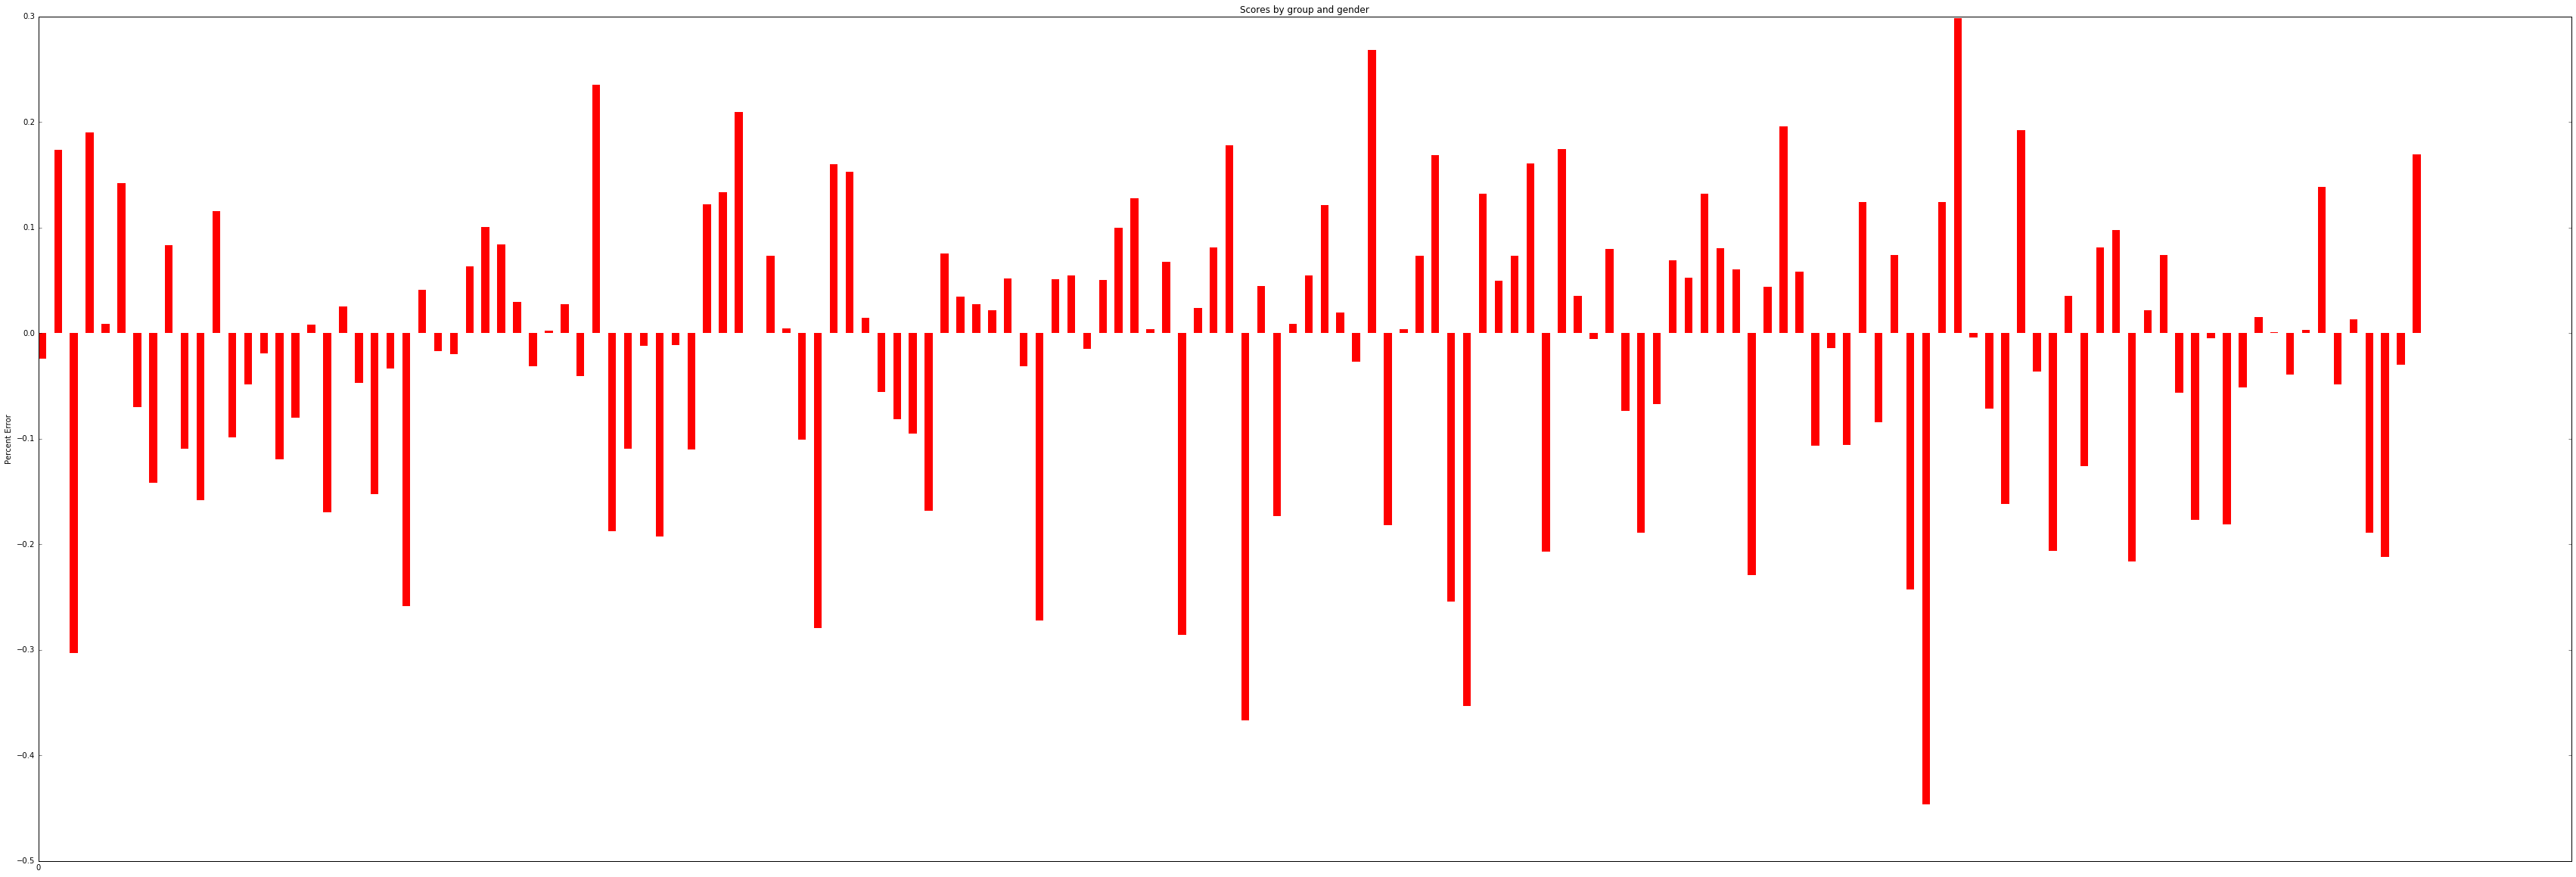

In [79]:
N = 151

ind = np.arange(N)  # the x locations for the groups
width = 0.5      # the width of the bars

fig, ax = plt.subplots(figsize = (60,20))
rects1 = ax.bar(ind, diff_cancer, width, color='r', edgecolor = "none")

#rects2 = ax.bar(ind + width, diff_cardio, width, color='b', edgecolor = "none")

#rects3 = ax.bar(ind + 2*width, diff_diabetes, width, color='y', edgecolor = "none")

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent Error')
ax.set_title('Scores by group and gender')
ax.set_xticks([0])
#ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

#ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


plt.show()